In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Finding the information related to dataset such as datatype of each column and the no of records in each column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


The Dataset has 13 Columns and 614 Rows.

Out of which 8 are object datatypes(i.e CATEGORICAL FEATURES)

and remaining 5 are int,float datatypes(i.e NUMERICAL FEATURES)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


This is the descriptive stats of the dataset

Now we will perform EDA(Exploratory Data Analysis) on the dataset and fine tune the dataset

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The dataset has minimal missing values in almost every alternate column.

In [6]:
a=[i for i in df.columns if df[i].dtypes=='O']
a.remove('Loan_ID')
for i in a:
    print(df[i].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


Here we can see the dataset is highly imbalanced and if we train the model using this dataset it is more likely to perform poorly and accuracy of the model goes down

Now we split the dataset into NUMERICAL FEATURES and CATEGORICAL FEATURES

In [7]:
numerical_features=[i for i in df.columns if df[i].dtypes!='O']
categorical_features=[i for i in df.columns if df[i].dtypes=='O']

In [8]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Now let's visulaise the data through graphs

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='Education', ylabel='Count'>

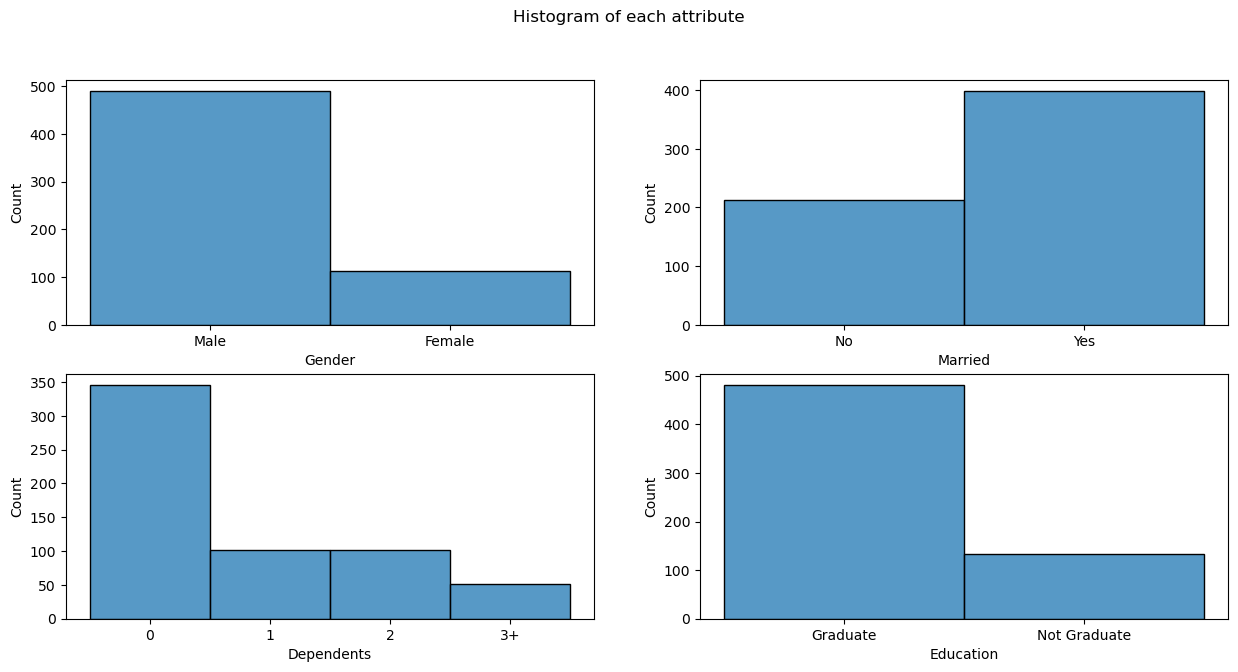

In [10]:
figs,axes=plt.subplots(2,2,figsize=(15,7))
plt.suptitle('Histogram of each attribute')
sns.histplot(ax=axes[0,0],data=df,x='Gender')
sns.histplot(ax=axes[0,1],data=df,x='Married')
sns.histplot(ax=axes[1,0],data=df,x='Dependents')
sns.histplot(ax=axes[1,1],data=df,x='Education')

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='Property_Area', ylabel='Count'>

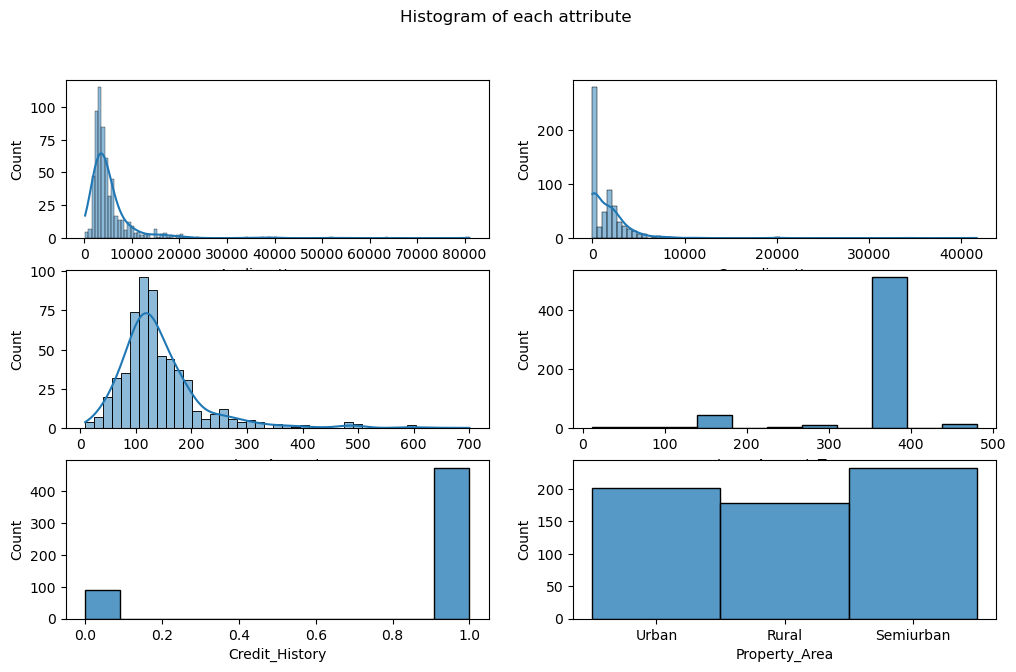

In [11]:
figs,axes=plt.subplots(3,2,figsize=(12,7))
plt.suptitle('Histogram of each attribute')
sns.histplot(ax=axes[0,0],data=df,x='ApplicantIncome',kde=True)
sns.histplot(ax=axes[0,1],data=df,x='CoapplicantIncome',kde=True)
sns.histplot(ax=axes[1,0],data=df,x='LoanAmount',kde=True)
sns.histplot(ax=axes[1,1],data=df,x='Loan_Amount_Term')
sns.histplot(ax=axes[2,0],data=df,x='Credit_History')
sns.histplot(ax=axes[2,1],data=df,x='Property_Area')


In [12]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [13]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode(),inplace=True)

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

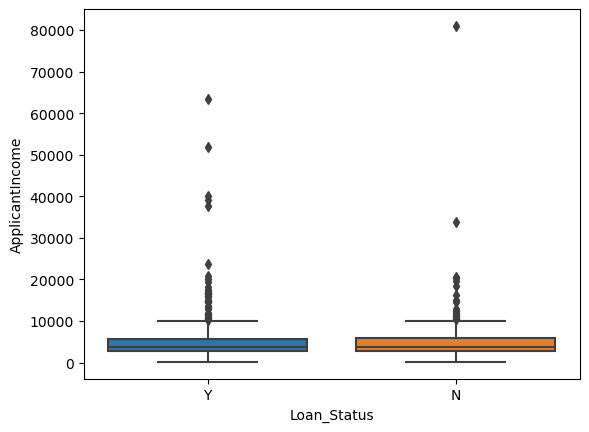

In [16]:
sns.boxplot(data=df,x='Loan_Status',y='ApplicantIncome')

In [17]:
Q1=df['ApplicantIncome'].quantile(0.25)
Q3=df['ApplicantIncome'].quantile(0.75)
IQR=Q3-Q1
IQR
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
df = df[(df['ApplicantIncome'] >= lower_fence) & (df['ApplicantIncome'] <= higher_fence)]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

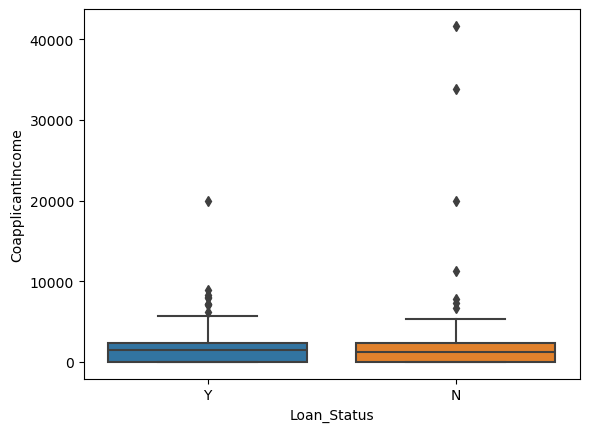

In [18]:
sns.boxplot(data=df,x='Loan_Status',y='CoapplicantIncome')

In [19]:
Q1=df['CoapplicantIncome'].quantile(0.25)
Q3=df['CoapplicantIncome'].quantile(0.75)
IQR=Q3-Q1
IQR
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
df = df[(df['CoapplicantIncome'] >= lower_fence) & (df['CoapplicantIncome'] <= higher_fence)]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

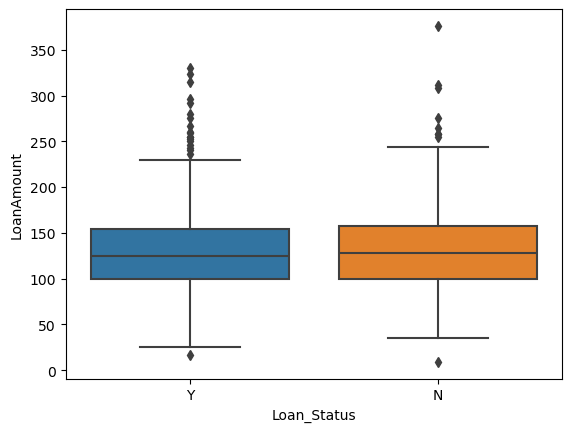

In [20]:
sns.boxplot(data=df,x='Loan_Status',y='LoanAmount')

In [21]:
Q1=df['LoanAmount'].quantile(0.25)
Q3=df['LoanAmount'].quantile(0.75)
IQR=Q3-Q1
IQR
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
df = df[(df['LoanAmount'] >= lower_fence) & (df['LoanAmount'] <= higher_fence)]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Loan_Status', ylabel='Count'>

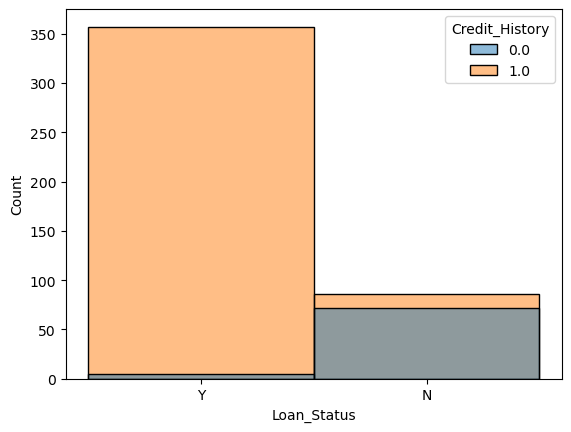

In [22]:
sns.histplot(data=df,x='Loan_Status',hue='Credit_History')

d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Loan_Status', ylabel='Count'>

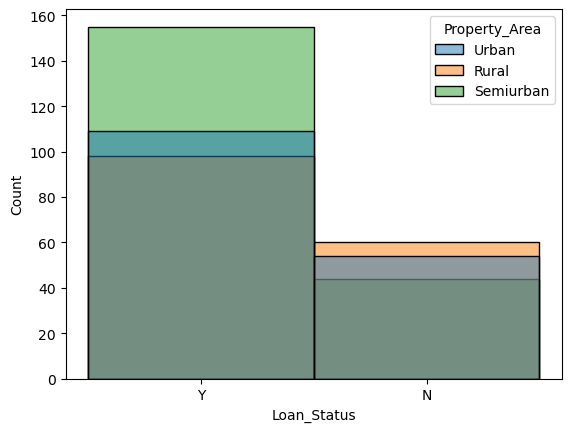

In [23]:
sns.histplot(data=df,x='Loan_Status',hue='Property_Area')

In [24]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [25]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
df['Gender']=encoder.fit_transform(df[['Gender']])


C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\3533411443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=encoder.fit_transform(df[['Gender']])


In [26]:
df['Married']=encoder.fit_transform(df[['Married']])

C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\498325033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married']=encoder.fit_transform(df[['Married']])


In [27]:
df['Dependents'].str.split('+')
df['Dependents']=df['Dependents'].str[0]

C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\3526656944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents']=df['Dependents'].str[0]


In [28]:
df.isnull().sum()

Loan_ID              0
Gender               9
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
df=df.dropna()

In [30]:
df['Property_Area']=encoder.fit_transform(df[['Property_Area']])
df['Education']=encoder.fit_transform(df[['Education']])
df['Self_Employed']=encoder.fit_transform(df[['Self_Employed']])

C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\596611929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Property_Area']=encoder.fit_transform(df[['Property_Area']])
C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\596611929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education']=encoder.fit_transform(df[['Education']])
C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\596611929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [31]:
df['Gender']=df['Gender'].astype(int)
df['Married']=df['Married'].astype(int)
df['Education']=df['Education'].astype(int)
df['Self_Employed']=df['Self_Employed'].astype(int)
df['Credit_History']=df['Credit_History'].astype(int)
df['Property_Area']=df['Property_Area'].astype(int)

C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\1250707102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=df['Gender'].astype(int)
C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\1250707102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married']=df['Married'].astype(int)
C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\1250707102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [32]:
df['Loan_Status']=encoder.fit_transform(df[['Loan_Status']])
df['Loan_Status']=df['Loan_Status'].astype(int)

C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\1760024379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Status']=encoder.fit_transform(df[['Loan_Status']])
C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\1760024379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Status']=df['Loan_Status'].astype(int)


URBAN=2             GRADUATE=0              SELF_emp

RURAL=0             NON-GRADUATE=1           YES=1

SEMI URBAN=1                                 NO=0

In [33]:
df.drop(['Loan_ID'],axis=1,inplace=True)

C:\Users\MEGHANSH\AppData\Local\Temp\ipykernel_26936\2703008726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Loan_ID'],axis=1,inplace=True)


<Axes: >

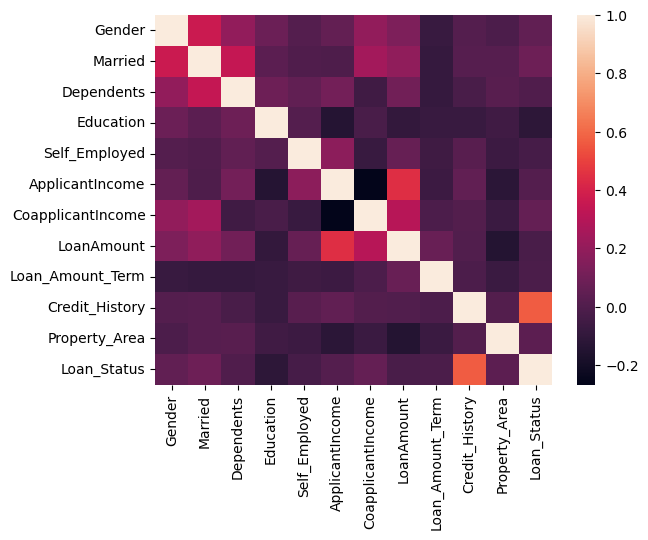

In [34]:
corr=df.corr
sns.heatmap(data=corr())

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.0,360.0,1,0,1
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [40]:
df_norm=pd.DataFrame(scaler.fit_transform(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]),columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])

In [48]:
df_new=pd.concat([df,df_norm],axis=1)

In [49]:
df_new.to_csv('new.csv')

In [60]:
df_new1=pd.read_csv('new.csv')

In [84]:
df_new1

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome.1,CoapplicantIncome.1,LoanAmount.1,Loan_Amount_Term.1
0,1,0,0,0,0,1,2,1.038162,-0.939142,0.115405,0.264493
1,1,1,1,0,0,1,0,0.326545,0.147340,0.115405,0.264493
2,1,1,0,0,1,1,2,-0.563257,-0.939142,-1.441779,0.264493
3,1,1,0,1,0,1,2,-0.797652,0.759747,-0.085522,0.264493
4,1,0,0,0,0,1,2,1.123039,-0.939142,0.441912,0.264493
...,...,...,...,...,...,...,...,...,...,...,...
506,1,1,0,0,0,1,0,1.123039,-0.939142,2.049328,-1.561941
507,0,0,0,0,0,1,0,-0.008466,0.077454,0.843766,0.264493
508,1,1,3,0,0,1,0,-0.432850,0.465792,-0.386912,0.264493
509,1,1,2,0,0,1,2,-0.619467,-0.939142,-1.316200,0.264493


In [64]:
df_new1.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],inplace=True,axis=1)

KeyError: "['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] not found in axis"

In [65]:
df_new1

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome.1,CoapplicantIncome.1,LoanAmount.1,Loan_Amount_Term.1
0,1,0,0,0,0,1,2,1,1.038162,-0.939142,0.115405,0.264493
1,1,1,1,0,0,1,0,0,0.326545,0.147340,0.115405,0.264493
2,1,1,0,0,1,1,2,1,-0.563257,-0.939142,-1.441779,0.264493
3,1,1,0,1,0,1,2,1,-0.797652,0.759747,-0.085522,0.264493
4,1,0,0,0,0,1,2,1,1.123039,-0.939142,0.441912,0.264493
...,...,...,...,...,...,...,...,...,...,...,...,...
506,1,1,0,0,0,1,0,1,1.123039,-0.939142,2.049328,-1.561941
507,0,0,0,0,0,1,0,1,-0.008466,0.077454,0.843766,0.264493
508,1,1,3,0,0,1,0,1,-0.432850,0.465792,-0.386912,0.264493
509,1,1,2,0,0,1,2,1,-0.619467,-0.939142,-1.316200,0.264493


In [66]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [82]:
#X=df_new1
#y=df['Loan_Status']

In [85]:
df_new1

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome.1,CoapplicantIncome.1,LoanAmount.1,Loan_Amount_Term.1
0,1,0,0,0,0,1,2,1.038162,-0.939142,0.115405,0.264493
1,1,1,1,0,0,1,0,0.326545,0.147340,0.115405,0.264493
2,1,1,0,0,1,1,2,-0.563257,-0.939142,-1.441779,0.264493
3,1,1,0,1,0,1,2,-0.797652,0.759747,-0.085522,0.264493
4,1,0,0,0,0,1,2,1.123039,-0.939142,0.441912,0.264493
...,...,...,...,...,...,...,...,...,...,...,...
506,1,1,0,0,0,1,0,1.123039,-0.939142,2.049328,-1.561941
507,0,0,0,0,0,1,0,-0.008466,0.077454,0.843766,0.264493
508,1,1,3,0,0,1,0,-0.432850,0.465792,-0.386912,0.264493
509,1,1,2,0,0,1,2,-0.619467,-0.939142,-1.316200,0.264493
